# Feature Engineering

This notebook applies feature engineering steps using our modular code:

- Encoding categorical variables
- Feature scaling (standardization, normalization)
- Creating new features using our modular feature engineering code

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import sys
import os
import warnings
warnings.filterwarnings('ignore')  # To avoid non-critical warnings
# Add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import our custom modules
from src.feature_engineering.encoding import encode_features
from src.feature_engineering.feature_engineering import engineer_features
from src.config import FEATURE_CONFIG

### Load the cleaned data from notebook 01

In [2]:
path = '../data/cleaned/heart_2022_cleaned_01.csv'
df = pd.read_csv(path, sep=',', encoding='utf-8')
df.sample(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,BMI_Category,SleepHours_Category
178628,Massachusetts,Male,Good,0.0,10.0,Within past 2 years (1 year but less than 2 ye...,Yes,5.0,1 to 5,0,...,39.53,Yes,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,No,Extremly Obese,Short Sleep
161227,Maryland,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,0,...,27.48,Yes,No,No,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,Overweight,Normal Sleep
404829,Washington,Female,Very good,2.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,0,...,27.02,Yes,No,No,No,"Yes, received Tdap",No,No,Overweight,Normal Sleep
171539,Massachusetts,Male,Excellent,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,7.0,None of them,0,...,28.19,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,Overweight,Normal Sleep
148935,Maine,Male,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,1,...,28.35,Yes,No,Yes,No,"Yes, received Tdap",No,No,Overweight,Normal Sleep


### 1. Encoding Categorical Variables

In [3]:
# Apply encoding
df = encode_features(df)
print("Remaining object (categorical) columns:")
df.describe(include='object').T

Remaining object (categorical) columns:


,count,unique,top,freq
State,445132,54,Washington,26152
RaceEthnicityCategory,445132,5,"White only, Non-Hispanic",334469


### 2. Feature Engineering

In [4]:
# Apply feature engineering
print("Creating interaction and polynomial features for:", FEATURE_CONFIG['interaction_features'])
df = engineer_features(df)
df.sample(5)

Creating interaction and polynomial features for: ['BMI', 'WeightInKilograms', 'HeightInMeters']


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,SleepHours_Category,BMI_WeightInKilograms_interaction,BMI_HeightInMeters_interaction,WeightInKilograms_HeightInMeters_interaction,BMI^2_poly,BMI_WeightInKilograms_poly,BMI_HeightInMeters_poly,WeightInKilograms^2_poly,WeightInKilograms_HeightInMeters_poly,HeightInMeters^2_poly
76202,Florida,1,3,2.0,0.0,3,1,7.0,1,0,...,0,1666.2072,40.8688,129.1746,527.1616,1666.2072,40.8688,5266.4049,129.1746,3.1684
358720,Texas,0,3,0.0,0.0,3,1,6.0,0,0,...,1,2220.8800,44.3360,133.0895,739.8400,2220.8800,44.3360,6666.7225,133.0895,2.6569
179520,Massachusetts,1,3,0.0,0.0,3,1,9.0,0,0,...,2,2036.5282,45.1388,159.4616,576.4801,2036.5282,45.1388,7194.4324,159.4616,3.5344
418477,West Virginia,0,3,1.0,6.0,1,1,7.0,0,0,...,0,916.2720,30.3000,68.0400,408.0400,916.2720,30.3000,2057.5296,68.0400,2.2500
126874,Kansas,1,3,0.0,0.0,3,0,8.0,1,0,...,0,2220.8586,47.1591,157.7094,664.0929,2220.8586,47.1591,7426.9924,157.7094,3.3489


### Rod can paste your work here

### visualizing interaction terms

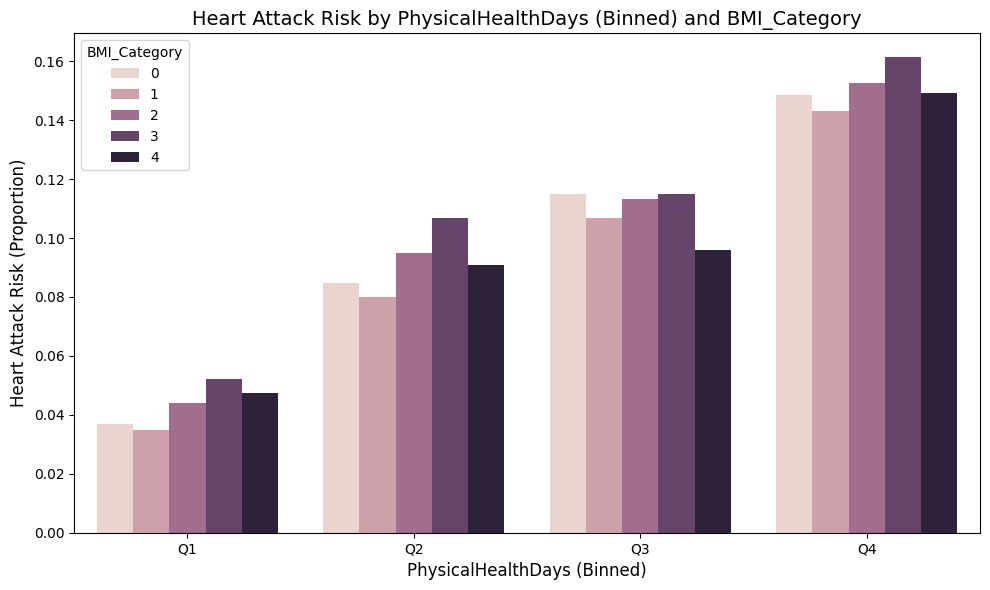

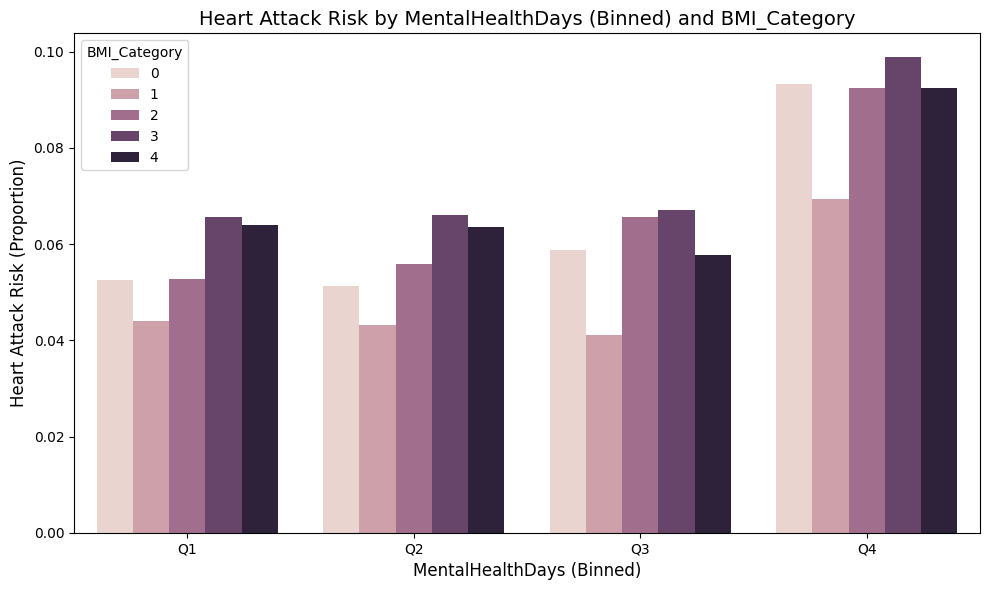

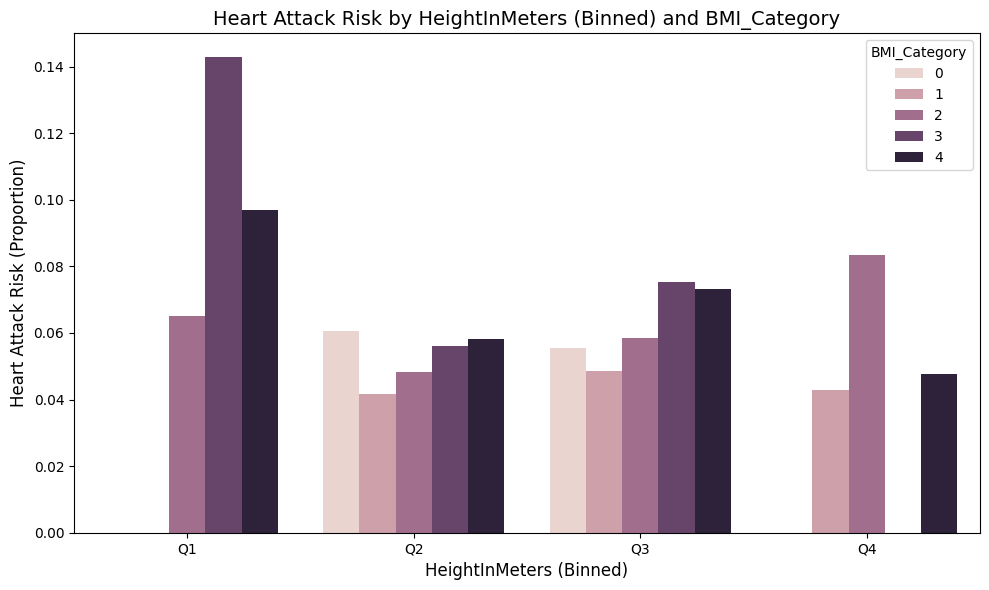

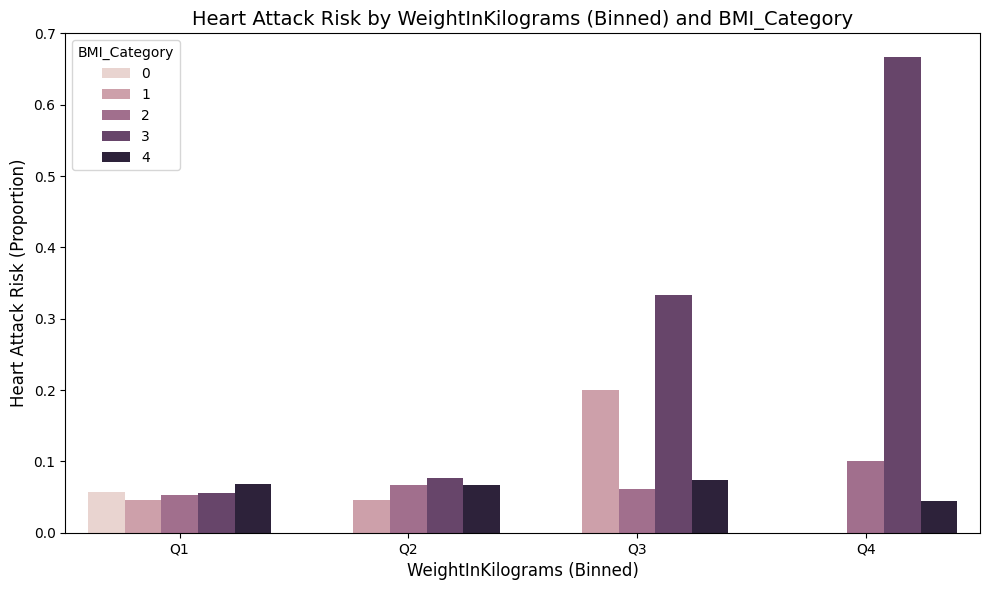

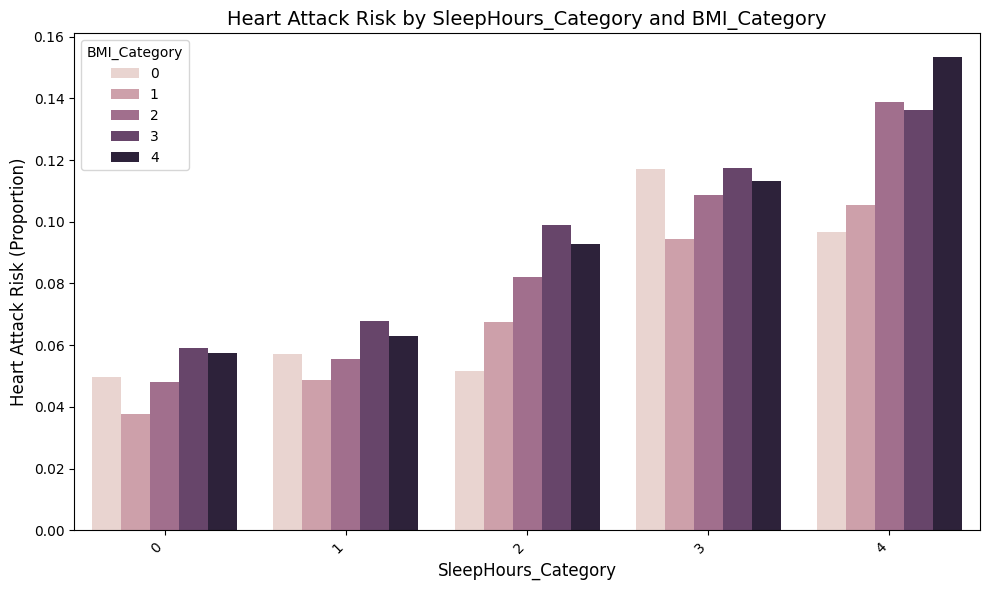

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# 定義特徵列表和目標變數
features = df.drop(columns="HadHeartAttack")
target = 'HadHeartAttack'

# 選擇一個主要分類變數作為交互基準
interaction_base = 'BMI_Category'

# 定義連續變數和分類變數
continuous_vars = ['PhysicalHealthDays', 'MentalHealthDays', 'HeightInMeters', 'WeightInKilograms']
binning_vars = ["SleepHours_Category"]

for feature in continuous_vars:
    # 將連續變數分組為 4 個區間
    df[f'{feature}_bin'] = pd.cut(df[feature], bins=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    
    # 計算每個區間和 BMI_Category 的心臟病風險比例
    grouped = df.groupby([f'{feature}_bin', interaction_base])[target].mean().reset_index()
    
    # 繪製長條圖
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped, x=f'{feature}_bin', y=target, hue=interaction_base, errorbar='sd')
    plt.title(f'Heart Attack Risk by {feature} (Binned) and {interaction_base}', fontsize=14)
    plt.xlabel(f'{feature} (Binned)', fontsize=12)
    plt.ylabel('Heart Attack Risk (Proportion)', fontsize=12)
    plt.legend(title=interaction_base)
    plt.tight_layout()
    plt.show()
    
    df = df.drop(columns=f'{feature}_bin')

for feature in binning_vars: 
    # 計算每個類別和 BMI_Category 的心臟病風險比例
    grouped = df.groupby([feature, interaction_base])[target].mean().reset_index()

    # 繪製長條圖
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped, x=feature, y=target, hue=interaction_base, errorbar='sd')
    plt.title(f'Heart Attack Risk by {feature} and {interaction_base}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Heart Attack Risk (Proportion)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=interaction_base)
    plt.tight_layout()
    plt.show()

### Construct interaction terms

In [7]:
df["Weight_MentalHealthDays"] = df["WeightInKilograms"] * df["MentalHealthDays"]
df["Weight_PhysicalHealthDays"] = df["WeightInKilograms"] * df["PhysicalHealthDays"]
df["Weight_HeightInMeters"] = df["WeightInKilograms"] * df["HeightInMeters"]
df["Weight_SleepHours"] = df["WeightInKilograms"] * df["SleepHours"]
df["Weight_BMI"] = df["WeightInKilograms"] * df["BMI"]

df["PhysicalHealthDays_MentalHealthDays"] = df["PhysicalHealthDays"] * df["MentalHealthDays"]
df["PhysicalHealthDays_SleepHours"] = df["PhysicalHealthDays"] * df["SleepHours"]
df["PhysicalHealthDays_Height"] = df["PhysicalHealthDays"] * df["HeightInMeters"]
df["PhysicalHealthDays_BMI"] = df["PhysicalHealthDays"] * df["BMI"]

df["MentalHealthDays_SleepHours"] = df["MentalHealthDays"] * df["SleepHours"]
df["MentalHealthDays_Height"] = df["MentalHealthDays"] * df["HeightInMeters"]
df["MentalHealthDays_BMI"] = df["MentalHealthDays"] * df["BMI"]

df["SleepHours_BMI"] = df["SleepHours"] * df["BMI"]
df["SleepHours_Height"] = df["SleepHours"] * df["HeightInMeters"]

df["BMI_Height"] = df["BMI"] * df["HeightInMeters"]





### 3. Feature Scaling

In [8]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns.tolist()

In [9]:
# Apply StandardScaler to the numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.sample(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,PhysicalHealthDays_MentalHealthDays,PhysicalHealthDays_SleepHours,PhysicalHealthDays_Height,PhysicalHealthDays_BMI,MentalHealthDays_SleepHours,MentalHealthDays_Height,MentalHealthDays_BMI,SleepHours_BMI,SleepHours_Height,BMI_Height
49230,Connecticut,0,3,-0.500394,-0.519475,3,1,-0.684849,3,0,...,-0.274640,-0.474026,-0.499374,-0.477244,-0.498037,-0.518521,-0.494448,-0.322461,-0.781301,0.093128
29131,California,1,4,-0.500394,-0.279255,2,1,-0.684849,1,0,...,-0.274640,-0.474026,-0.499374,-0.477244,-0.290423,-0.276367,-0.329413,-1.187168,-0.644460,-1.120456
409552,Washington,0,3,-0.500394,-0.519475,3,1,-0.015726,0,0,...,-0.274640,-0.474026,-0.499374,-0.477244,-0.498037,-0.518521,-0.494448,-0.863356,-0.074291,-1.213151
7858,Alaska,0,2,-0.500394,-0.519475,3,0,1.991645,1,0,...,-0.274640,-0.474026,-0.499374,-0.477244,-0.498037,-0.518521,-0.494448,3.363661,1.841478,1.786504
60397,District of Columbia,0,2,-0.385038,-0.279255,2,1,-0.684849,2,0,...,-0.261368,-0.378419,-0.397312,-0.339567,-0.290423,-0.306105,-0.203535,0.410811,-1.123403,0.704967


### 4. Save the Engineered Dataset

In [10]:
output_path = '../data/cleaned/heart_2022_cleaned_02.csv'
df.to_csv(output_path, index=False)
print(f"Saved engineered dataset to {output_path}")

Saved engineered dataset to ../data/cleaned/heart_2022_cleaned_02.csv
